In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [1]:
from experiment import *
exp = Experiment(name="Exp1", dry_run=True)

yolo_v3 = YOLO(version='V3')
yolo_v5s = YOLO(version='V5S')
yolo_v5x = YOLO(version='V5X')
faster_rcnn = FasterRCNN()
mask_rcnn = MaskRCNN()
retinanet = RetinaNet()
ssd = SSD()

exp.add_model(yolo_v3) 
exp.add_model(yolo_v5s)
exp.add_model(yolo_v5x) 
exp.add_model(mask_rcnn)
exp.add_model(faster_rcnn)
exp.add_model(retinanet)
exp.add_model(ssd)


#exp.run_experiment()
df = exp.evaluate_results()

Using cache found in /Users/bariscekic/.cache/torch/hub/ultralytics_yolov3_master
Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients
Adding AutoShape... 
YOLOv3 🚀 2021-7-2 torch 1.9.0 CPU

Using cache found in /Users/bariscekic/.cache/torch/hub/ultralytics_yolov5_master
Fusing layers... 
/opt/anaconda3/envs/AI/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Model Summary: 224 layers, 7266973 parameters, 0 gradients
Adding AutoShape... 
YOLOv3 🚀 2021-7-2 torch 1.9.0 CPU

Using cache found in /Users/bariscekic/.cache/torch/hub/ultralytics_yolov5_master
Fusing layers... 
Model Summary: 476 layers, 87730285 parameters, 0 gradients

ModelName : 	 yolov3_________________________________________
loading annotations into memory...
Done (t=0.65s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.03s).
Accumulating evaluation results...
DONE (t=0.11s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.415
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.550
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.438
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.192
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.578
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.693
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.330
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.432
 Av

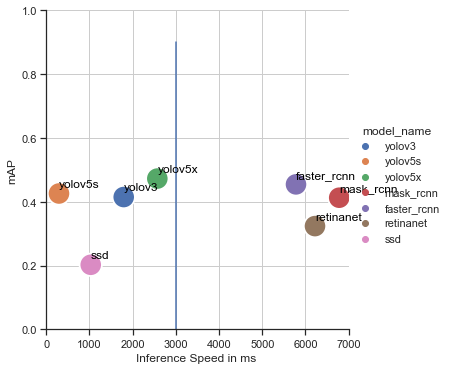

In [7]:
%matplotlib inline
sns.relplot(x="Inference", y="AP", data=df, hue="model_name", s=500)
sns.set(style="ticks")
plt.grid()
plt.xlabel('Inference Speed in ms ')
plt.ylabel('mAP')
plt.xlim(0, 7000)
plt.ylim(0, 1)

# add annotations one by one with a loop
for line in range(0,df.shape[0]):
    plt.text(df.Inference[line]-0.10, df.AP[line]+0.02, df.model_name[line], horizontalalignment='left', size='medium', color='black', weight='regular')
df.head()
# Real time seperator at 30ms , it will not be visible on CPU
plt.axvline(30, 0,0.9)
